In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display
import numpy as np

df = pd.read_csv("pcap.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,18.211.118.21,192.168.1.248,TCP,66,443 > 33100 [ACK] Seq=1 Ack=1 Win=17 Len=0 T...
1,2,0.000465,18.211.118.21,192.168.1.248,TLSv1.2,122,Application Data
2,3,0.433247,149.112.112.112,192.168.1.248,TCP,66,443 > 52906 [ACK] Seq=1 Ack=1 Win=588 Len=0 ...
3,4,0.579567,149.112.112.112,192.168.1.248,TLSv1.2,313,Application Data
4,5,1.048138,208.85.40.20,192.168.1.248,TCP,66,443 > 42740 [ACK] Seq=1 Ack=1 Win=65535 Len=...


## Standard deviation

I will treat my data as a population instead of a sample as in my other posts.  The formula for the population standard deviation is:

$$\sigma=\sqrt{\frac{\sum(x-\mu)^2}{N}}$$

Where $\mu$ is the mean, $x$ is a data point, and $N$ is the total number of elements.

In [8]:
print(f"According to Pandas: {df.Length.std()}")
print(f"According to Numpy: {np.std(df.Length)}")

std = round(sqrt(sum((df.Length.values - df.Length.mean())**2)/len(df.Length)))
print(f"\nAccording to me: {std}")

According to Pandas: 192.97823413684435
According to Numpy: 189.73467146400935

According to me: 190


#### Note!

Always be sure to read the documentation of the libraries you are using.  The Pandas number is wrong by any stretch.  Their `std` function is _sample_ standard deviation, not population.  Numpy uses population.

## Five number summary

Quartiles!  I messed this up on the test.  I got my means and medians mixed up.  I should have done a better job of checking my work!

Q2 = median  
Q1 = median(x $\leq$ Q2)  
Q3 = median(x $\geq$ Q2)  

Range = max - min  
IQR = Q3 - Q1

In [9]:
Q2 = df.Length.median()
Q1 = df.Length[df.Length <= Q2].median()
Q3 = df.Length[df.Length >= Q2].median()
IQR = Q3 - Q1
Range = max(df.Length) - min(df.Length)

label = f"""{'First quartile:':20}{Q1:>8.1f}
{'Second quartile: ':20}{Q2:>8.1f}
{'Third quartile: ':20}{Q3:>8.1f}
{'Range: ':20}{Range:>8.1f}
{'IQR: ':20}{IQR:>8.1f}
{'Standard dev: ':20}{std:>8.1f}"""

print(label)

First quartile:         66.0
Second quartile:        81.5
Third quartile:        134.0
Range:                 760.0
IQR:                    68.0
Standard dev:          190.0


In [10]:
df.Length.quantile([0.25, 0.5, 0.75])

0.25     66.0
0.50     81.5
0.75    134.0
Name: Length, dtype: float64

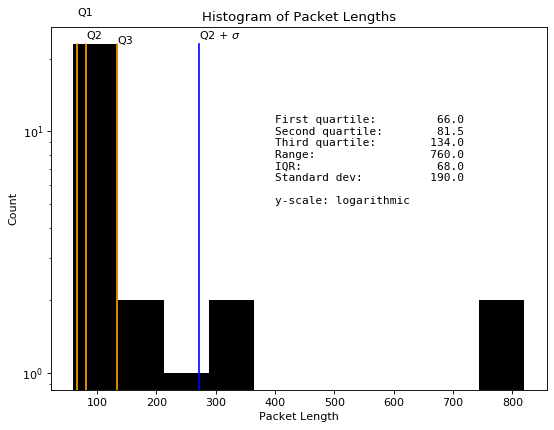

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
       
_ = df.Length.hist(log=True, color="black")
plt.xlabel('Packet Length')
plt.ylabel('Count')
plt.title('Histogram of Packet Lengths')
plt.text(400, 5, label + "\n\ny-scale: logarithmic", family='monospace')
plt.grid(False)
plt.plot([Q1, Q1], [0, 23], color="orange")
plt.text(Q1, 30, "Q1")
plt.plot([Q2]*2, [0, 23], color="orange")
plt.text(Q2, 24, "Q2")
plt.plot([Q2 + std]*2, [0, 23], color="blue")
plt.text(Q2 + std, 24, "Q2 + $\sigma$")
plt.plot([Q3]*2, [0, 23], color="orange")
plt.text(Q3, 23, "Q3")
plt.show()

## Conclusions

Dr. Flink suggested in an earlier post that I look at using a logarithmic scale, which is what I have shown above.  My data is heavily skewed, and I think scaling smoothes it out a bit without losing sight of the bigger picture.  The skewness is also made apparent by the quartiles being piled up to the left as well.  $Q2 - \sigma$ falls off the chart, but the positive half is graphed.  This small of a data collection doesn't yield many interesting results.  The larger data sets I have been looking at for the final project are a lot more compelling to look at.  Have a great weekend!